# Derivación con Python

Esta sección pretende ser un compendio (esperemos que claro y ordenado) de todo el `Python` 
que hemos ido usando en las cinco primeras secciones del Capítulo 3. 

**Objetivos:**

- Cálculo de las derivadas parciales y direccionales.
- Cálculo del vector gradiente.
- Cálculo del plano tangente y de la recta normal.
- Regla de la cadena.

## Derivadas parciales para funciones de dos variables con `Python`

Veamos ahora cómo calcular derivadas parciales utilizando sympy. 

La función clave es `sp.diff`. que debe llevar como argumentos la expresión a derivar (o función Lambda, también vale) y, a continuación, la variable respecto a la que queremos hacerlo. 

Veamos un par de ejemplos:

In [4]:
import sympy as sp
x, y = sp.symbols('x y', real=True) # define las variables simbólicas x, y

f_expr = 5* x**3 * y**2 + 4* x**2 * y**3

df_x_expr = sp.diff(f_expr,x)   # Derivada parcial respecto a x
df_y_expr = sp.diff(f_expr,y)   # Derivada parcial respecto a y

df_x = sp.Lambda((x,y),df_x_expr)  # Creamos una función Lambda para la derivada respecto x

display(df_x_expr) 
display(df_y_expr)

print("df_x(1,2): ",df_x(1,2))  # Usamos la función Lambda para evaluar la derivada en un punto
display(df_x)

15*x**2*y**2 + 8*x*y**3

10*x**3*y + 12*x**2*y**2

df_x(1,2):  124


Lambda((x, y), 15*x**2*y**2 + 8*x*y**3)

## Derivadas parciales para funciones de tres o más variables

In [5]:
import sympy as sp
x, y, z = sp.symbols('x y z', real=True) # define las variables simbólicas x, y, z

f_expr = 5* x**4 * y**3 * z**2 + 4* x**2 * y**3 * z**4

df_x_expr = sp.diff(f_expr,x)   # Derivada parcial respecto a x
df_y_expr = sp.diff(f_expr,y)   # Derivada parcial respecto a y
df_z_expr = sp.diff(f_expr,z)   # Derivada parcial respecto a z


df_x = sp.Lambda((x,y,z),df_x_expr)  # Creamos una función Lambda para la derivada respecto x

display(df_x_expr) 
display(df_y_expr)
display(df_z_expr)

print("df_x(1,2,3): ",df_x(1,2,3))  # Usamos la función Lambda para evaluar la derivada en un punto
display(df_x)

20*x**3*y**3*z**2 + 8*x*y**3*z**4

15*x**4*y**2*z**2 + 12*x**2*y**2*z**4

10*x**4*y**3*z + 16*x**2*y**3*z**3

df_x(1,2,3):  6624


Lambda((x, y, z), 20*x**3*y**3*z**2 + 8*x*y**3*z**4)

## Derivadas parciales de orden superior

In [6]:
import sympy as sp
x, y = sp.symbols('x y', real=True) # define las variables simbólicas x, y

f_expr = 5* x**3 * y**2 + 4* x**2 * y**3

df_xx_expr = sp.diff(f_expr,x,x)   # Derivada parcial respecto a x dos veces. También se puede escribir sp.diff(f_expr,x,2)
df_yx_expr = sp.diff(f_expr,x,y)   # Derivada parcial primero respecto x, luego respecto y
df_xy_expr = sp.diff(f_expr,y,x)   # Derivada parcial primero respecto y, luego respecto x
df_yy_expr = sp.diff(f_expr,y,y)   # Derivada parcial respecto a x dos veces

display(df_xx_expr) 
display(df_yx_expr)
display(df_xy_expr)
display(df_yy_expr)

2*y**2*(15*x + 4*y)

6*x*y*(5*x + 4*y)

6*x*y*(5*x + 4*y)

2*x**2*(5*x + 12*y)

## Cálculo del vector gradiente

Calculamos el vector gradiente como la transpuesta de la matriz jacobiana para funciones de $\mathbb{R}^{n}$ a $\mathbb{R}$, como se muestra en el siguiente ejemplo.

In [7]:
import sympy as sp

x, y = sp.symbols('x y', real=True) 

F = sp.Matrix([3*x**2-5*y**2])

# Cálculo del jacobiano de F
jac_F = F.jacobian([x,y])
grad_F = jac_F.transpose()

# NOTA: Se puede hacer lo mismo en un único paso:
# grad_F = F.jacobian([x,y]).transpose()

display(grad_F)

Matrix([
[  6*x],
[-10*y]])

## Derivada direccional

Mostramos a continuación cómo calcular la derivada direccional de la función $f(x,y) = x\sqrt{y}$, en un punto cualquiera $(x,y)$, según la dirección que marca el vector $\mathbf{u}=(1,2)$. 

In [8]:
import sympy as sp

x, y = sp.symbols('x y', real=True) 

F = sp.Matrix([ x*sp.sqrt(y) ])

grad_F = F.jacobian([x,y]).transpose()
display(grad_F)

u = sp.Matrix([1, 2]) # Definimos un vector director unitario

display(u)
norm_u = sp.sqrt(u.dot(u))
u = u/norm_u
display(u)

df_u = u.dot(grad_F)
display(df_u)


Matrix([
[      sqrt(y)],
[x/(2*sqrt(y))]])

Matrix([
[1],
[2]])

Matrix([
[  sqrt(5)/5],
[2*sqrt(5)/5]])

sqrt(5)*x/(5*sqrt(y)) + sqrt(5)*sqrt(y)/5

## El vector gradiente es ortogonal a las curvas de nivel

Lo mostramos gráficamente sobre un ejemplo sencillo.

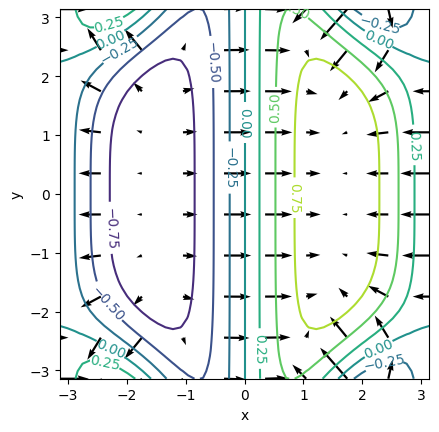

In [9]:
import sympy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

x, y = sp.symbols('x y', real=True) # define las variables simbólicas x, y

F = sp.Matrix([ sp.sin(x)*sp.cos(x*y**2/10) ])
F_lamb = sp.lambdify((x,y),F[0,0], "numpy")
# display(F_lamb)

grad_F = F.jacobian([x,y]).transpose()
grad_F_lamb = sp.lambdify((x,y), [grad_F[0,0],grad_F[1,0]], "numpy") 
# Creamos una función lambdify del gradiente para poder evaluarlo en cualquier punto

N = 50  # 50 puntos en cada dirección de los ejes cartesianos para las curvas de nivel
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)
X, Y = np.meshgrid(x, y)
Values = F_lamb(X,Y)

Ng = 10  # 10 puntos en cada dirección de los ejes cartesianos para los vectores gradientes
xg = np.linspace(-np.pi, np.pi, Ng)
yg = np.linspace(-np.pi, np.pi, Ng)
Xg, Yg = np.meshgrid(xg, yg)
Values_Grad=grad_F_lamb(Xg,Yg)

p = plt.contour(X, Y, Values) # Representación gráfica de las curvas de nivel
plt.clabel(p) # Se añade el valor numérico a cada curva de nivel
plt.quiver(Xg, Yg, Values_Grad[0], Values_Grad[1]) # Representación gráfica del campo de vectores gradiente
# plt.quiver(Xg, Yg, Values_Grad) # Representación gráfica del campo de vectores gradiente
# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.show()

## Cálculo y representación del plano tangente y de la recta normal con `Python`

Consideramos a continuación el problema de encontrar el plano tangente y la recta normal a la superficie $z=f(x,y)=x^2+y^2+3$ en el punto $(x_0,y_0,z_0)=(1,1/2,f(1,1/2))$, que resolvemos, en `Python`, aplicando los resultados expuestos. En primer lugar, importamos los módulos necesarios teniendo en cuenta que usaremos `Matplotlib` para la representación gráfica. 

In [10]:
import sympy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

Ahora vamos a calcular:

1. Plano tangente.
2. Ángulo de inclinación de éste.
3. Recta normal.

In [11]:
x, y, z, t = sp.symbols('x y z t', real=True) # definimos las variables simbólicas
f = sp.Lambda((x,y), x**2+y**2+3)
x0 = 1; y0=sp.Rational(1/2); z0=f(x0,y0)

# Cálculo de la ecuación del plano tangente
F = sp.Matrix([f(x,y)-z])
grad_F = F.jacobian([x,y,z]).transpose()
n = grad_F.subs(x,x0).subs(y,y0).subs(z,z0)
plano_tang = sp.solve(sp.Eq(n[0]*(x-x0)+n[1]*(y-y0)+n[2]*(z-z0),0),z)[0]

display(plano_tang)

# Cálculo de la inclinación del plano tangente
angulo=sp.acos(sp.Abs(n[2])/sp.sqrt(n.dot(n)))
display('Ángulo de inclinación del plano tangente:',angulo) 

# Cálculo de la ecuación vectorial de la recta normal
recta_norm = sp.Lambda(t,(x0+t*n[0], y0+t*n[1], z0+t*n[2]))

display(recta_norm)

2*x + y + 7/4

'Ángulo de inclinación del plano tangente:'

acos(sqrt(6)/6)

Lambda(t, (2*t + 1, t + 1/2, 17/4 - t))

Una vez calculado el plano tangente y la recta normal, se traslada la información del módulo **Sympy** a **Numpy**, para un uso posterior en **Matplotlib** y graficamos:

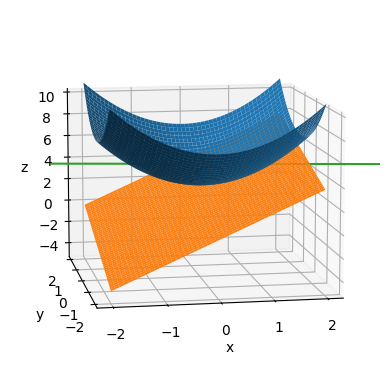

In [12]:
f_n = sp.lambdify((x,y),f(x,y),"numpy") # función numpy con la expresión de f(x,y)
Plano_tang = sp.lambdify((x,y),plano_tang,"numpy") 
Recta_norm = sp.lambdify(t,recta_norm(t),"numpy") 

# Nube de puntos para representar la superficie y el plano
N = 50
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(x, y)
fval = f_n(X,Y)
Pval = Plano_tang(X,Y)

# Conjunto de puntos para representar la recta normal
tvec = np.linspace(-2, 2, 100)
Rval = Recta_norm(tvec)

# Creación de la figura 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Representación de la superficie z=f(x,y), el plano tangente y la recta normal
surf_F = ax.plot_surface(X, Y, fval) 
surf_Plano = ax.plot_surface(X, Y, Pval)
recta = ax.plot3D(*Rval)
# Etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Punto de vista del observador: elevación, ángulo azimutal
ax.view_init(elev=10, azim=-100)
ax.auto_scale_xyz([-2,2],[-2,2],[-5,10])
plt.show()